**Business Understanding**:
- Tujuan: membantu perusahaan pelayaran atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan penumpabg, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.
- Manfaat: memberikan insight untuk perbaikan sistem keselamatan di masa depan. Dapat digunakan untuk pelatihan model prediksi pada kaasus serupa di Industri transportasi.
- Output Model: Prediksi (0 = Tidak Selamat, 1 = Selamat) untuk setiap penumpang berdasarkan fitur input.



# **Import Library dan Load Data**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/Praktikum_ML/praktikum13/data/titanic_cleaned.csv")

#cetak header data
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


# **2. Pra pemrosesan data**

In [6]:
#misal kolom target bernama 'Survived', dan fitur lain sudah bersih
X = df.drop('Survived', axis=1)
y = df['Survived']

#split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **3. Membangun Arsitektur Neural Network (2 Hidden Layer)**

In [7]:
#membuat model neural network dengan 2 hidden layer
model = Sequential()

#input layer dan hidden layer pertama (16 neuron, aktivasi relu)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
#hidden layer kedua (8 neuron, aktivasi relu)
model.add(Dense(8, activation='relu'))
#output layer (1 neuron, aktivasi sigmoid untuk klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

#menampilkan ringkasan arsitektur model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

# **4. Kompilasi dan Training Model**

In [8]:
#kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


fungsi model.compile() digunakan untuk mengkonfigurasi model sebelum proses training dimulai.

In [9]:
#training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4916 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6405 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6871 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6753 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6358 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7037 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6440 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6172 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

# **5, Evaluasi Model**

In [10]:
#Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss pada data uji: {loss:.2f}')
print(f'Akurasi pada data uji: {accuracy:.2f}')

Loss pada data uji: nan
Akurasi pada data uji: 0.60


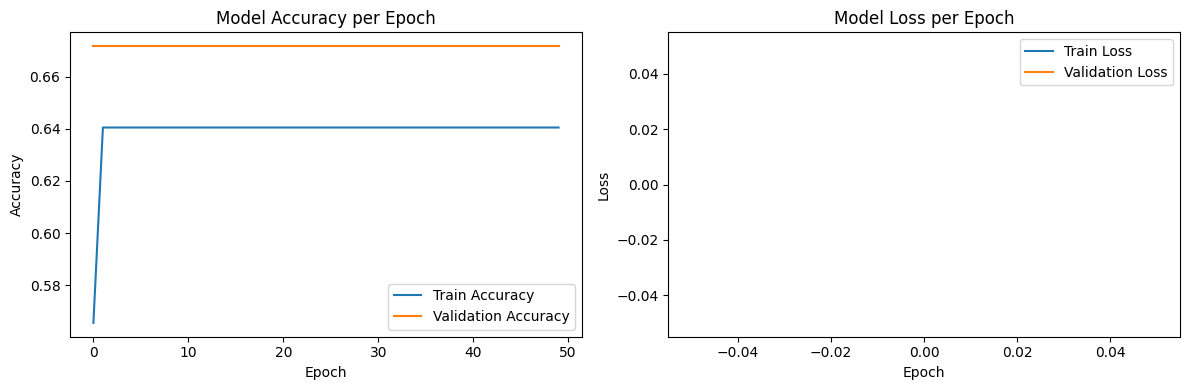

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Visualisasi Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()